# Feature Engineeering - Categorical

Frequent Category Imputation

In [5]:
import pandas as pd
df=pd.read_csv('Datasets/train.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [7]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [10]:
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

Compute the frequency with every feature

In [12]:
df.groupby(['BsmtQual'])['BsmtQual'].count()

BsmtQual
Ex    121
Fa     35
Gd    618
TA    649
Name: BsmtQual, dtype: int64

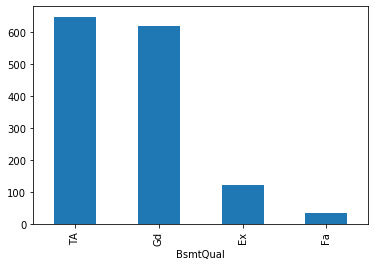

In [14]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

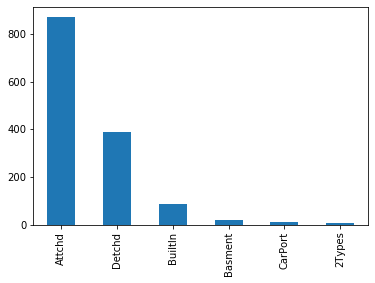

In [19]:
df.GarageType.value_counts().sort_values(ascending=False).plot.bar()

In [21]:
df.GarageType.value_counts().index[0]

'Attchd'

In [23]:
def impute_nan(df,variable):
    most_frequent_category=df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [25]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [28]:
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

In [30]:
df.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

Advantages:

    1. easy to implement
    
    2. Faster way to implement
    
Downsides:

    1.Since we are using more frequent labels,it may use them in over represented way if there are many NAN's
    
    2.It distorts the relation of the most frequent label.
    

# 2. Adding a variable to capture NAN

In [53]:
import pandas as pd
df=pd.read_csv('Datasets/train.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [54]:
import numpy as np
df['BsmtQual_var']=np.where(df['BsmtQual'].isnull(),1,0)
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [55]:
frequent=df['BsmtQual'].mode()[0]
df['BsmtQual'].isnull().sum()

37

In [57]:
df['BsmtQual']=df['BsmtQual'].fillna(frequent)
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [59]:
df['BsmtQual'].isnull().sum()

0

In [60]:
#Repeat the same steps for all categorical features.
# Suppose if you have more frequent categories .we just replace NAN with a new category

In [62]:
import pandas as pd
df=pd.read_csv('Datasets/train.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [65]:
def impute_nan(df,variable):
    df[variable+"_newvar"]=np.where(df[variable].isnull(),'Missing',df[variable])
for feature in ['BsmtQual','FireplaceQu','GarageType','SalePrice']:
    impute_nan(df,feature)
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar,SalePrice_newvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd,208500
1,Gd,TA,Attchd,181500,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000,Gd,TA,Attchd,250000


# One hot encoding 

In [68]:
import pandas as pd
df=pd.read_csv('Datasets/titanic.csv',usecols=['Sex'])
df.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [71]:
pd.get_dummies(df).head()

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [73]:
df=pd.get_dummies(df,drop_first=True)
df.head()

,Sex_male
0,1
1,0
2,0
3,0
4,1


In [87]:
df=pd.read_csv('Datasets/titanic.csv',usecols=['Embarked'])
df.head()

,Embarked
0,S
1,C
2,S
3,S
4,S


In [77]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [81]:
df['Embarked'].dropna(inplace=True)
df.head()

,Embarked
0,S
1,C
2,S
3,S
4,S


In [88]:
df=pd.get_dummies(df,drop_first=False)
df.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


# What if feature has multiple categeries?
Replace top 10 most frequent categeries with 1 and replace all other with 0

In [90]:
import pandas as pd
df=pd.read_csv('Datasets/benz.csv',usecols=['X1'])
df.head()

,X1
0,v
1,t
2,w
3,t
4,v


In [96]:
df['X1'].value_counts().sort_values(ascending=False).head(10)

aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
Name: X1, dtype: int64

In [101]:
index=df['X1'].value_counts().sort_values(ascending=False).head(10).index
print(index)
categeries=list(index)

Index(['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o'], dtype='object')


In [103]:
for category in categeries:
    df[category]=np.where(df['X1'] == category,1,0)

df.head(10)

# Ordinal Number Encoding

E.g -> Grading System -- A,B,C,D,E

A-1
B-2
C-3
D-4
E-5

Experience of a batsmen

A-10--1
B-5--2
C-3--3

Mon,Tue,Wed,Thu,Fri,Sat,Sun

Mon-1
Tue-2
Wed-3
Thu-4 etc..

In [110]:
import datetime
today=datetime.datetime.today()
today

datetime.datetime(2020, 9, 2, 12, 38, 42, 274872)

In [111]:
today-datetime.timedelta(3)

datetime.datetime(2020, 8, 30, 12, 38, 42, 274872)

In [115]:
days=[today-datetime.timedelta(x) for x in range(0,15)]
days

[datetime.datetime(2020, 9, 2, 12, 38, 42, 274872),
 datetime.datetime(2020, 9, 1, 12, 38, 42, 274872),
 datetime.datetime(2020, 8, 31, 12, 38, 42, 274872),
 datetime.datetime(2020, 8, 30, 12, 38, 42, 274872),
 datetime.datetime(2020, 8, 29, 12, 38, 42, 274872),
 datetime.datetime(2020, 8, 28, 12, 38, 42, 274872),
 datetime.datetime(2020, 8, 27, 12, 38, 42, 274872),
 datetime.datetime(2020, 8, 26, 12, 38, 42, 274872),
 datetime.datetime(2020, 8, 25, 12, 38, 42, 274872),
 datetime.datetime(2020, 8, 24, 12, 38, 42, 274872),
 datetime.datetime(2020, 8, 23, 12, 38, 42, 274872),
 datetime.datetime(2020, 8, 22, 12, 38, 42, 274872),
 datetime.datetime(2020, 8, 21, 12, 38, 42, 274872),
 datetime.datetime(2020, 8, 20, 12, 38, 42, 274872),
 datetime.datetime(2020, 8, 19, 12, 38, 42, 274872)]

In [118]:
df=pd.DataFrame(days,columns=['Day'])
df

,Day
0,2020-09-02 12:38:42.274872
1,2020-09-01 12:38:42.274872
2,2020-08-31 12:38:42.274872
3,2020-08-30 12:38:42.274872
4,2020-08-29 12:38:42.274872
5,2020-08-28 12:38:42.274872
6,2020-08-27 12:38:42.274872
7,2020-08-26 12:38:42.274872
8,2020-08-25 12:38:42.274872
9,2020-08-24 12:38:42.274872


In [119]:
df['Day'].dt.weekday_name

0     Wednesday
1       Tuesday
2        Monday
3        Sunday
4      Saturday
5        Friday
6      Thursday
7     Wednesday
8       Tuesday
9        Monday
10       Sunday
11     Saturday
12       Friday
13     Thursday
14    Wednesday
Name: Day, dtype: object

In [122]:
df['Weekday']=df['Day'].dt.weekday_name
df.head()

,Day,Weekday
0,2020-09-02 12:38:42.274872,Wednesday
1,2020-09-01 12:38:42.274872,Tuesday
2,2020-08-31 12:38:42.274872,Monday
3,2020-08-30 12:38:42.274872,Sunday
4,2020-08-29 12:38:42.274872,Saturday


In [124]:
day_dict={'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}

In [126]:
df['weekday_number']=df['Weekday'].map(day_dict)

In [128]:
df.head()

,Day,Weekday,weekday_number
0,2020-09-02 12:38:42.274872,Wednesday,3
1,2020-09-01 12:38:42.274872,Tuesday,2
2,2020-08-31 12:38:42.274872,Monday,1
3,2020-08-30 12:38:42.274872,Sunday,7
4,2020-08-29 12:38:42.274872,Saturday,6


# Count or Frequency Encoding

In [141]:
df=pd.read_csv('Datasets/adult.data',header=None,index_col=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [142]:
columns=[1,3,5,6,7,8,9,13]
df=df[columns]
df.head()
df.columns=['Employment','Degree','Status','Designation','family_job','Race','Sex','Country']
df.head()

,Employment,Degree,Status,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [145]:
for feature in df.columns:
    print(feature,":",len(df[feature].unique())," labels")

Employment : 9  labels
Degree : 16  labels
Status : 7  labels
Designation : 15  labels
family_job : 6  labels
Race : 5  labels
Sex : 2  labels
Country : 42  labels


In [150]:
#Replace country values with their respective frequency
country_dict=df['Country'].value_counts().to_dict()
country_dict

{' United-States': 29170,
 ' Mexico': 643,
 ' ?': 583,
 ' Philippines': 198,
 ' Germany': 137,
 ' Canada': 121,
 ' Puerto-Rico': 114,
 ' El-Salvador': 106,
 ' India': 100,
 ' Cuba': 95,
 ' England': 90,
 ' Jamaica': 81,
 ' South': 80,
 ' China': 75,
 ' Italy': 73,
 ' Dominican-Republic': 70,
 ' Vietnam': 67,
 ' Guatemala': 64,
 ' Japan': 62,
 ' Poland': 60,
 ' Columbia': 59,
 ' Taiwan': 51,
 ' Haiti': 44,
 ' Iran': 43,
 ' Portugal': 37,
 ' Nicaragua': 34,
 ' Peru': 31,
 ' Greece': 29,
 ' France': 29,
 ' Ecuador': 28,
 ' Ireland': 24,
 ' Hong': 20,
 ' Trinadad&Tobago': 19,
 ' Cambodia': 19,
 ' Thailand': 18,
 ' Laos': 18,
 ' Yugoslavia': 16,
 ' Outlying-US(Guam-USVI-etc)': 14,
 ' Hungary': 13,
 ' Honduras': 13,
 ' Scotland': 12,
 ' Holand-Netherlands': 1}

In [153]:
df['Country']=df['Country'].map(country_dict)

In [155]:
df.head()

,Employment,Degree,Status,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,29170
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,29170
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,29170
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,29170
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,95


## Advantages

1.Easy to use

2. Not increasing any feature space

## Disadvantages

1. What if two countries have same frequenccy? IT will provide same weight if the frequencies are same

# Target guided ordinal Encoding

1. Ordering the labels according to the target
2. Replace the labels by the joint probability of being 1 or 0

In [157]:
import pandas as pd
df=pd.read_csv('Datasets/titanic.csv',usecols=['Cabin','Survived'])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [160]:
df['Cabin'].fillna('Missing',inplace=True)
df.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [166]:
df['Cabin']=df['Cabin'].astype(str).str[0]

In [168]:
df['Cabin'].unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [170]:
df.groupby(['Cabin'])['Survived'].mean()

Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299854
T    0.000000
Name: Survived, dtype: float64

In [172]:
df.groupby(['Cabin'])['Survived'].mean().sort_values()

Cabin
T    0.000000
M    0.299854
A    0.466667
G    0.500000
C    0.593220
F    0.615385
B    0.744681
E    0.750000
D    0.757576
Name: Survived, dtype: float64

In [177]:
ordinal_ind=df.groupby(['Cabin'])['Survived'].mean().sort_values().index
ordinal_ind

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [179]:
ordinal_labels={k:i for i,k in enumerate(ordinal_ind,0)}
ordinal_labels

{'T': 0, 'M': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}

In [182]:
df['Cabin_ordinals']=df['Cabin'].map(ordinal_labels)
df.head()

,Survived,Cabin,Cabin_ordinals
0,0,M,1
1,1,C,4
2,1,M,1
3,1,C,4
4,0,M,1


# Mean Encoding

In [185]:
mean_dict=df.groupby(['Cabin'])['Survived'].mean().to_dict()

In [188]:
df['Cabin_mean_ordinal']=df['Cabin'].map(mean_dict)
df.head()

,Survived,Cabin,Cabin_ordinals,Cabin_mean_ordinal
0,0,M,1,0.299854
1,1,C,4,0.593220
2,1,M,1,0.299854
3,1,C,4,0.593220
4,0,M,1,0.299854


# Probability Ratio Encoding
1. Probability of survived based on Cabin -- Categorical feature

2. Probaboility of Not survived --> 1- prob(survived)

3. prob(survived)/prob(not_survived)

4. Dictinoary to map cabin with probability

5. replace with the categorical

In [190]:
import pandas as pd
df=pd.read_csv('Datasets/titanic.csv',usecols=['Cabin','Survived'])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [193]:
df['Cabin'].fillna('Missing',inplace=True)
df.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [197]:
df['Cabin']=df['Cabin'].astype(str).str[0]
df['Cabin'].unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [201]:
prob_df=df.groupby(['Cabin'])['Survived'].mean()

In [207]:
prob_df.head()

Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
Name: Survived, dtype: float64

In [210]:
prob_df=pd.DataFrame(prob_df)
prob_df

,Survived
Cabin,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000
M,0.299854
T,0.000000


In [212]:
prob_df['Died']=1-prob_df['Survived']
prob_df.head()

,Survived,Died
Cabin,,
A,0.466667,0.533333
B,0.744681,0.255319
C,0.593220,0.406780
D,0.757576,0.242424
E,0.750000,0.250000


In [215]:
prob_df['Prob_ratio']=prob_df['Survived']/prob_df['Died']
prob_df.head()

,Survived,Died,Prob_ratio
Cabin,,,
A,0.466667,0.533333,0.875000
B,0.744681,0.255319,2.916667
C,0.593220,0.406780,1.458333
D,0.757576,0.242424,3.125000
E,0.750000,0.250000,3.000000


In [217]:
prob_df['Prob_ratio'].to_dict()

{'A': 0.875,
 'B': 2.916666666666666,
 'C': 1.4583333333333333,
 'D': 3.125,
 'E': 3.0,
 'F': 1.6000000000000003,
 'G': 1.0,
 'M': 0.42827442827442824,
 'T': 0.0}

In [220]:
df['cabin_encoded']=df['Cabin'].map(prob_df['Prob_ratio'].to_dict())
df.head()

,Survived,Cabin,cabin_encoded
0,0,M,0.428274
1,1,C,1.458333
2,1,M,0.428274
3,1,C,1.458333
4,0,M,0.428274
